<a href="https://colab.research.google.com/github/anirudhjbabu1/stock-market-prediction-model-ANN-and-RNN-using-LSTM-model/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The following program contains two models for comparison of ANN and Rnn using LSTM

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LSTM
from keras.models import load_model
from sklearn.metrics import mean_squared_error




In [ ]:
#reading the panda file
df=pd.read_csv('/content/RELIANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [ ]:

req=df['Close']
req.head()

0    251.70
1    271.85
2    282.50
3    294.35
4    314.55
Name: Close, dtype: float64

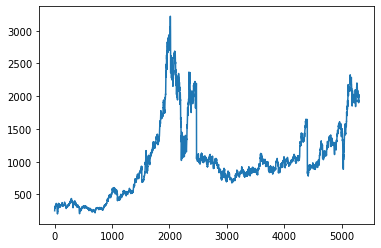

In [ ]:
plt.plot(req)

In [ ]:

scalar=MinMaxScaler(feature_range=(0,1))
req=scalar.fit_transform(np.array(req).reshape(-1,1))

for i in req:
  print(i)

Streaming output truncated to the last 5000 lines.
[0.06302918]
[0.05843951]
[0.05998045]
[0.06213444]
[0.06587908]
[0.0640399]
[0.06175335]
[0.06225043]
[0.06218415]
[0.05961593]
[0.05949994]
[0.05104966]
[0.04155552]
[0.040114]
[0.03119977]
[0.03477872]
[0.03711497]
[0.04109158]
[0.05519195]
[0.05157987]
[0.0500058]
[0.04846487]
[0.0515136]
[0.05025434]
[0.04710619]
[0.04616175]
[0.04609547]
[0.04664225]
[0.04655941]
[0.04563153]
[0.04735473]
[0.04922705]
[0.05035375]
[0.05042003]
[0.05189469]
[0.05553991]
[0.05426408]
[0.05943367]
[0.05688201]
[0.0574785]
[0.05774361]
[0.05893659]
[0.06286349]
[0.06307889]
[0.06481865]
[0.06634302]
[0.06241612]
[0.06266466]
[0.05867148]
[0.05684887]
[0.05625238]
[0.05380014]
[0.05335277]
[0.05540735]
[0.05550677]
[0.05529137]
[0.05706427]
[0.05325336]
[0.05116564]
[0.04553212]
[0.04760327]
[0.0469405]
[0.04569781]
[0.04612861]
[0.0458138]
[0.0475867]
[0.05133133]
[0.05272315]
[0.05477772]
[0.0515136]
[0.04182062]
[0.04076019]
[0.04259937]
[0.0405945

In [ ]:

print("total size",len(req))
training_data_size=int(len(req)*0.7)
print("train size",training_data_size)
testing_data_size=len(req)-training_data_size
print("test size",testing_data_size)


total size 5306
train size 3714
test size 1592


In [ ]:

training_data=req[0:training_data_size]
print(len(training_data))
testing_data=req[training_data_size:len(req)]
print(len(testing_data))

3714
1592


In [ ]:

X_train=[]
Y_train=[]
timestep=100
t=0
for i in range(0,len(training_data)-timestep-1):
  data=training_data[i:i+timestep,0]
  X_train.append(data)
  Y_train.append(training_data[i+timestep,0])

X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(X_train[0])
print(Y_train[0])
# print(tr_data[1])
# print(te_data[1])
print(X_train.shape)
print(Y_train.shape)


[0.01607211 0.02274949 0.02627873 0.03020562 0.03689957 0.0348947
 0.02826703 0.03264129 0.03600484 0.0374795  0.03497755 0.03678359
 0.03857306 0.03633622 0.0408099  0.04074363 0.03868905 0.0436598
 0.04478651 0.04140639 0.04336156 0.045383   0.04588007 0.04670853
 0.04652627 0.04612861 0.04877968 0.05055258 0.05305453 0.04934303
 0.04677481 0.04803407 0.05015492 0.04846487 0.04720561 0.04346097
 0.04195318 0.04425629 0.04155552 0.04304674 0.03567345 0.03764519
 0.02934403 0.02162279 0.01681772 0.0129571  0.00985866 0.00931188
 0.00452339 0.         0.00530214 0.01111792 0.01048829 0.01149901
 0.01332162 0.01250973 0.01239375 0.01877289 0.02566567 0.02256723
 0.02975826 0.0375292  0.04155552 0.03285669 0.03282355 0.04074363
 0.04939274 0.05346876 0.04988981 0.04465395 0.03570659 0.03154773
 0.03209451 0.03699899 0.04458768 0.04432257 0.04269879 0.05128163
 0.04720561 0.04700678 0.04173778 0.04135668 0.04440541 0.04379235
 0.04003115 0.04147267 0.04044538 0.03762862 0.03734694 0.038539

In [ ]:

X_test=[]
Y_test=[]
timestep=100
t=0
for i in range(0,len(testing_data)-timestep-1):
  data=testing_data[i:i+timestep,0]
  X_test.append(data)
  Y_test.append(testing_data[i+timestep,0])

X_test=np.array(X_test)
Y_test=np.array(Y_test)
print(X_test[0])
print(Y_test[0])
# print(tr_data[1])
# print(te_data[1])
print(X_test.shape)
print(Y_test.shape)

[0.26172684 0.25975511 0.26028532 0.2612629  0.25132139 0.25166935
 0.25355823 0.25031067 0.24991301 0.24568787 0.2441138  0.2416947
 0.23294617 0.22505923 0.22388282 0.21917717 0.22080095 0.22431362
 0.23109042 0.23253194 0.22883701 0.22565573 0.22721323 0.22991401
 0.22433019 0.22797541 0.22689841 0.22611966 0.22290524 0.20973274
 0.21576392 0.21170447 0.21775222 0.21443839 0.21206899 0.20935165
 0.21906119 0.22086723 0.2241645  0.23191888 0.233145   0.22552317
 0.22656703 0.22727951 0.23317814 0.24065084 0.23596176 0.2335758
 0.24336818 0.24045201 0.23876195 0.23418886 0.22981459 0.22494325
 0.23114013 0.23394032 0.23670737 0.23183603 0.23145494 0.23158749
 0.22199394 0.21481948 0.21150564 0.21206899 0.2116879  0.21617815
 0.21935944 0.21906119 0.23117326 0.22688185 0.22592083 0.22085066
 0.21737113 0.21631071 0.21891207 0.21437211 0.21172104 0.21660895
 0.22051928 0.21637698 0.21569765 0.21167133 0.21365964 0.21264892
 0.20747933 0.20164698 0.20133216 0.20638576 0.20971617 0.205938

In [ ]:



X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])
print(X_test.shape)

(1491, 100)


In [ ]:

model=Sequential()

model.add(Dense(64,input_shape=(100,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# model=load_model('/content/model5.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 256)               6

In [ ]:
# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=2, monitor='loss')]
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=64)

Epoch 1/20
57/57 [==============================] - 3s 30ms/step - loss: 0.0089 - val_loss: 0.0044
Epoch 2/20
57/57 [==============================] - 2s 29ms/step - loss: 0.0018 - val_loss: 9.4019e-04
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 4/20
57/57 [==============================] - 1s 23ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 6/20
57/57 [==============================] - 2s 27ms/step - loss: 9.8534e-04 - val_loss: 0.0039
Epoch 7/20
57/57 [==============================] - 2s 33ms/step - loss: 8.6124e-04 - val_loss: 0.0029
Epoch 8/20
57/57 [==============================] - 2s 33ms/step - loss: 7.7505e-04 - val_loss: 0.0044
Epoch 9/20
57/57 [==============================] - 2s 31ms/step - loss: 8.6905e-04 - val_loss: 0.0028
Epoch 10/20
57/57 [==============================] - 2s 30ms/step - loss: 8.3237e-04 - va

In [ ]:
model.save('/content/model2.h5')


In [ ]:
t1=model.predict(X_test)
t1_i=scalar.inverse_transform(t1)


In [ ]:
print(t1.shape)

(1491, 1)


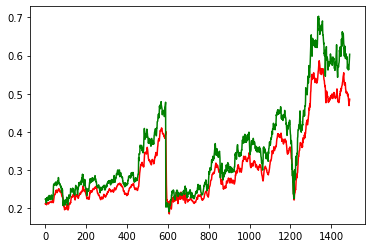

In [ ]:

plt.plot(range(0,len(t1)),t1,'r')
plt.plot(range(0,len(t1)),Y_test,'g')

In [ ]:
#finding the accuracy
from sklearn.metrics import r2_score
print("The r2 square is :",(r2_score(Y_test,t1)))
import math

math.sqrt(mean_squared_error(Y_test,t1))

The r2 square is : 0.8214699196333219


0.052452878068494094

In [ ]:
# LSTM MODEL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=64)

Epoch 1/20
57/57 [==============================] - 22s 261ms/step - loss: 0.0109 - val_loss: 8.9525e-04
Epoch 2/20
57/57 [==============================] - 13s 237ms/step - loss: 9.4832e-04 - val_loss: 9.4360e-04
Epoch 3/20
57/57 [==============================] - 15s 259ms/step - loss: 8.7760e-04 - val_loss: 7.9951e-04
Epoch 4/20
57/57 [==============================] - 11s 200ms/step - loss: 7.8621e-04 - val_loss: 7.1285e-04
Epoch 5/20
57/57 [==============================] - 13s 230ms/step - loss: 8.1325e-04 - val_loss: 6.6239e-04
Epoch 6/20
57/57 [==============================] - 13s 235ms/step - loss: 7.0731e-04 - val_loss: 7.8306e-04
Epoch 7/20
57/57 [==============================] - 12s 216ms/step - loss: 6.6125e-04 - val_loss: 5.7439e-04
Epoch 8/20
57/57 [==============================] - 11s 197ms/step - loss: 6.5738e-04 - val_loss: 5.8750e-04
Epoch 9/20
57/57 [==============================] - 12s 206ms/step - loss: 5.8291e-04 - val_loss: 6.0542e-04
Epoch 10/20
57/57 [====

In [ ]:
t2=model.predict(X_test)
t2_i=scalar.inverse_transform(t1)
print(t2.shape)

(1491, 1)


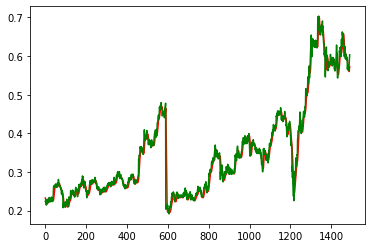

In [ ]:
plt.plot(range(0,len(t2)),t2,'r')
plt.plot(range(0,len(t2)),Y_test,'g')

In [ ]:
#finding the accuracy
from sklearn.metrics import r2_score
print("The r2 square is :",(r2_score(Y_test,t2)))
import math

math.sqrt(mean_squared_error(Y_test,t2))

The r2 square is : 0.9786716285953161


0.01812977732067751